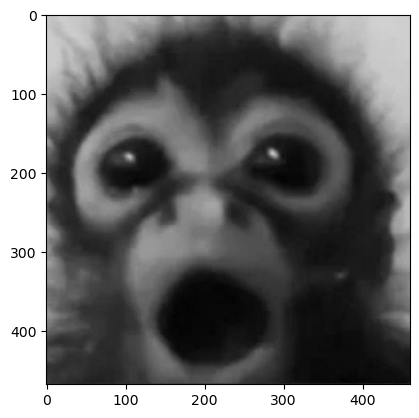

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

img = Image.open("./monke.jpg")
img = img.convert('LA')
plt.imshow(img)

In [2]:
X = np.array(list(img.getdata(band=0)), float)
X.shape = (img.size[1], img.size[0])
print('Shape: ', X.shape)
print('Rank: ', np.linalg.matrix_rank(X))

Shape:  (468, 460)
Rank:  460


In [3]:
def compress_img(X, r):
    U, sigma, V = np.linalg.svd(X)
    x_hat = np.dot(np.dot(U[:, :r], np.diag(sigma[:r])), V[:r, :])
    plt.title('n = %s' % r)
    plt.imshow(x_hat, cmap='gray')

In [4]:
def return_compressed_img(X, r):
    U, sigma, V = np.linalg.svd(X)
    return np.dot(np.dot(U[:, :r], np.diag(sigma[:r])), V[:r, :])

def calculate_error(X, r):
    x_hat = return_compressed_img(X, r)
    return np.linalg.norm(X - x_hat)

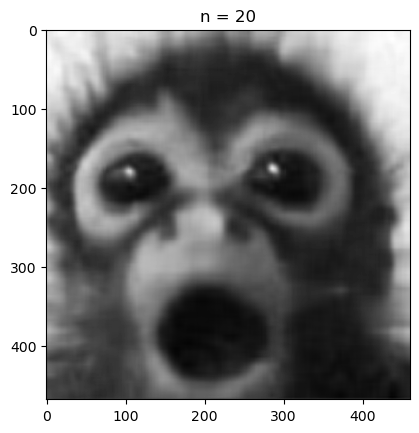

In [5]:
compress_img(X, 20)

In [6]:
def plot_SVD_approx(X):
    r_vals = np.arange(1, min(X.shape), 10)
    errors = [calculate_error(X, r) for r in r_vals]
    
    plt.plot(r_vals, errors, label='$X - \hat{x}$')
    plt.xlabel('Rank')
    plt.ylabel('Error')
    plt.xlim(0, 200)
    plt.ylim(0, 4000)
    plt.title('SVD error')
    plt.grid(True)
    plt.show()

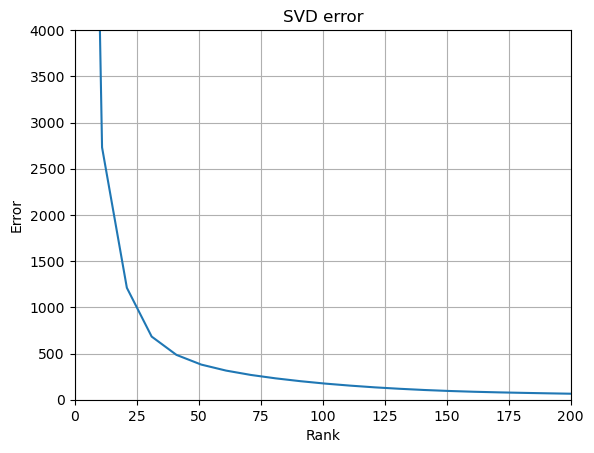

In [7]:
plot_SVD_approx(X)